# A short intro to W3C prov and the python prov library

### Python prov library

- [Tutorial](https://trungdong.github.io/prov-python-short-tutorial.html)
- [The github repo](https://github.com/trungdong/prov)

#### The generic W3C prov graph model

The generic prov graph model is based on:
- Nodes (Agent, Entity, Activity) connected by
- Edges (wasAttributedTo, wasDerivedFrom, wasGeneratedBy, used, wasAssociatedWith)

see the following graphical representation (taken from https://www.w3.org/TR/prov-overview/)

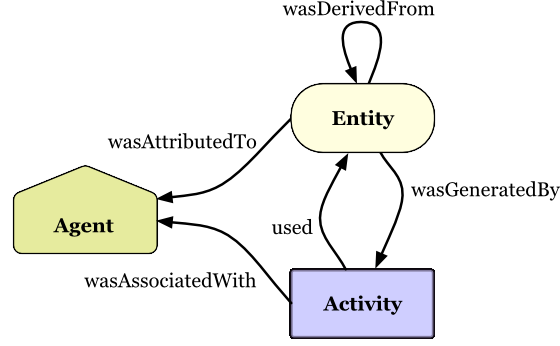

In [2]:
from IPython.display import display, Image
Image(filename='key-concepts.png')

## Example Prov-JSON export and import

In [12]:
from prov.model import ProvDocument
d1 = ProvDocument()

In [13]:
%%writefile tmp/wps-prov.json

{  
    "prefix": {
        "enes": "http://www.enes.org/enes_entitiy/", 
        "workflow": "http://www.enes.org/enes/workflow/#", 
        "dc": "http://dublin-core.org/", 
        "user": "http://www.enes.org/enes_entity/user/", 
        "file": "http://www.enes.org/enes_entity/file/", 
        "esgf": "http://carbon.dkrz.de/file/cmip5/", 
        "enes_data": "http://enes_org/enes_data#"
    },     
    "entity": { 
        "enes:input-data-set.nc": {
            "dc:title": "eval_series_1", 
            "prov:type": "Dataset", 
            "prov:label": "experiment-mpi-m"
            },  
        "enes:temporal-mean-result1-v1.nc": {
            "dc:title": "eval_series_1_1"
            } 
    },  
    "wasDerivedFrom": {
        "enes:process-step1": {
        "prov:usedEntity": "enes:input-data-set.nc", 
        "prov:generatedEntity": "enes:temporal-mean-result1-v1.nc"
        }
    },         
    "activity": {
        "workflow:temporal-mean-cdo": {
        }
    },       
    "used": {
    "enes:used-rel1": {
      "prov:entity": "enes:input-data-set.nc", 
      "prov:activity": "workflow:temporal-mean-cdo"
      }
    },
    "wasGeneratedBy": {
        "enes:gen-rel1": {
        "prov:entity": "enes:temporal-mean-result1-v1.nc", 
        "prov:activity": "workflow:temporal-mean-cdo"
      }
    },
    "agent": {
        "enes:Stephan Kindermann": {}
    }, 
    "wasAttributedTo": {
        "enes:data-generator-rel1": {
        "prov:entity": "enes:temporal-mean-result1-v1.nc", 
        "prov:agent": "enes:Stephan Kindermann"
      }
    }   
}

Writing tmp/wps-prov.json


In [14]:
d2 = ProvDocument.deserialize('tmp/wps-prov.json')

In [15]:
print(d2.serialize(indent=2))

{
  "prefix": {
    "enes": "http://www.enes.org/enes_entitiy/",
    "workflow": "http://www.enes.org/enes/workflow/#",
    "dc": "http://dublin-core.org/",
    "user": "http://www.enes.org/enes_entity/user/",
    "file": "http://www.enes.org/enes_entity/file/",
    "esgf": "http://carbon.dkrz.de/file/cmip5/",
    "enes_data": "http://enes_org/enes_data#"
  },
  "entity": {
    "enes:input-data-set.nc": {
      "dc:title": "eval_series_1",
      "prov:type": "Dataset",
      "prov:label": "experiment-mpi-m"
    },
    "enes:temporal-mean-result1-v1.nc": {
      "dc:title": "eval_series_1_1"
    }
  },
  "wasDerivedFrom": {
    "enes:process-step1": {
      "prov:usedEntity": "enes:input-data-set.nc",
      "prov:generatedEntity": "enes:temporal-mean-result1-v1.nc"
    }
  },
  "activity": {
    "workflow:temporal-mean-cdo": {}
  },
  "used": {
    "enes:used-rel1": {
      "prov:entity": "enes:input-data-set.nc",
      "prov:activity": "workflow:temporal-mean-cdo"
    }
  },
  "wasGene

In [16]:
def visualize_prov(prov_doc):
    from prov.dot import prov_to_dot
    from IPython.display import Image
    dot = prov_to_dot(prov_doc)
    dot.write_png('tmp/tmp1.png')
    dot.write_pdf('tmp/tmp1.pdf')
    
    return Image('tmp/tmp1.png')

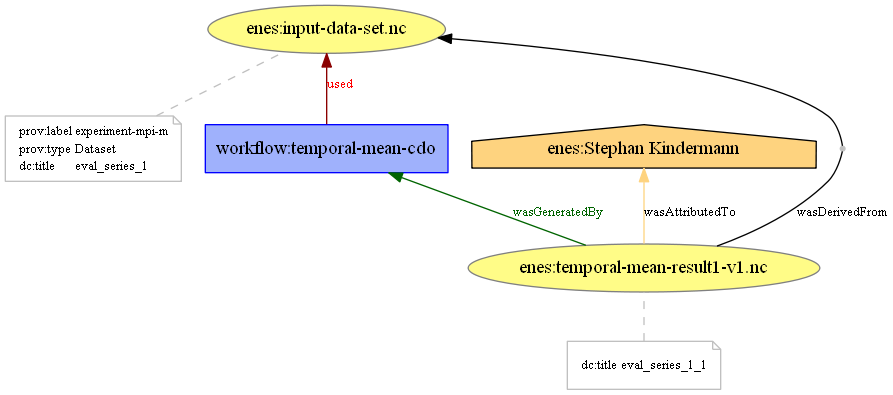

In [17]:
visualize_prov(d2)